<a href="https://colab.research.google.com/github/Nscaglio/4105_project/blob/main/credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import math
import sys
import numpy
from google.colab import drive

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/ECGR4105/Datasets/Project/NS Code/credit_card_fraud_dataset.csv'
ds = pd.DataFrame(pd.read_csv(file_path))
ds['TransactionType'] = ds['TransactionType'].map({'refund':1,'purchase':0})
pd.set_option('display.max_columns', None)
ds.head()

Mounted at /content/drive


,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,1,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,1,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,0,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,0,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,0,Phoenix,0


In [ ]:
#randomize training and validation
ds_train, ds_validate = train_test_split(ds, train_size = 0.8, test_size = 0.2, random_state = 100)
#get x and y for training and validation
YT = ds_train.iloc[:, 6].values
YV = ds_validate.iloc[:, 6].values
XT = np.delete(ds_train, [0,1,5,6], axis=1)
XV = np.delete(ds_validate, [0,1,5,6], axis=1)
#Standardize
scale = StandardScaler()
XT = scale.fit_transform(XT)
XV = scale.fit_transform(XV)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic accuracy = 0.9905
Logistic precision = 0.0
Logistic recall = 0.0


Text(0.5, 427.9555555555555, 'Predicted label')

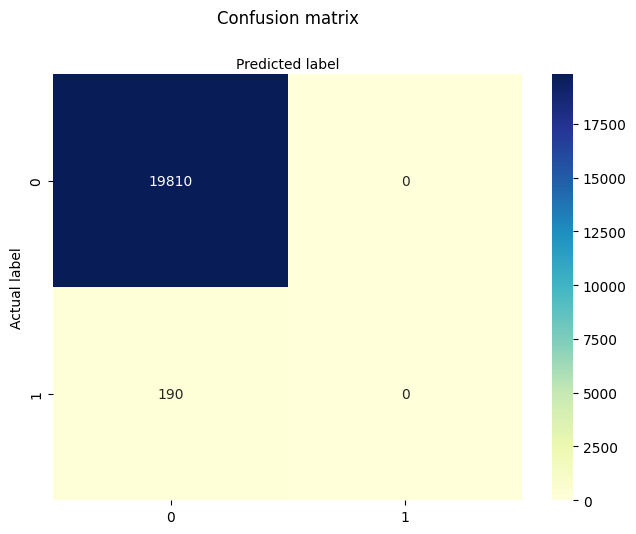

In [ ]:
# Implement Logistic regression model
clf = LogisticRegression()
Model1 = clf.fit(XT, YT)
Pred1 = Model1.predict(XV)
A1 = metrics.accuracy_score(YV, Pred1)
P1 = metrics.precision_score(YV, Pred1)
R1 = metrics.recall_score(YV, Pred1)
print("Logistic accuracy =", A1)
print("Logistic precision =", P1)
print("Logistic recall =", R1)
cnf_matrix = confusion_matrix(YV, Pred1)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Bayes accuracy = 0.7023
Bayes precision = 0.009363295880149813
Bayes recall = 0.2894736842105263


Text(0.5, 427.9555555555555, 'Predicted label')

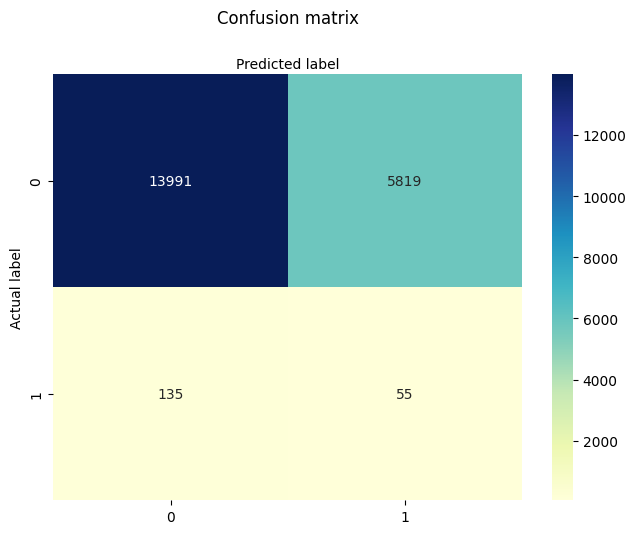

In [ ]:
# Implement Naive Bayes regression
gnb = GaussianNB(priors=[0.505,0.495])
Model2 = gnb.fit(XT, YT)
Pred2 = Model2.predict(XV)
matrix2 = confusion_matrix(YV, Pred2)
A2 = metrics.accuracy_score(YV, Pred2)
P2 = metrics.precision_score(YV, Pred2)
R2 = metrics.recall_score(YV, Pred2)
print("Bayes accuracy =", A2)
print("Bayes precision =", P2)
print("Bayes recall =", R2)
cnf_matrix = confusion_matrix(YV, Pred2)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.4327 - loss: 0.7370 - val_accuracy: 0.1154 - val_loss: 0.7024
Epoch 2/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.3438 - loss: 0.7019 - val_accuracy: 0.6640 - val_loss: 0.6951
Epoch 3/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6633 - loss: 0.6859 - val_accuracy: 0.2113 - val_loss: 0.6941
Epoch 4/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2600 - loss: 0.7055 - val_accuracy: 0.9905 - val_loss: 0.6847
Epoch 5/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6876 - loss: 0.6941 - val_accuracy: 0.1648 - val_loss: 0.6961
Epoch 6/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.4165 - loss: 0.6920 - val_accuracy: 0.3882 - val_loss: 0.6853
Epoch 7/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.3039 - loss: 0.7046 - val_accuracy: 0.0230 - val_loss: 0.7074
Epoch 8/40
2667/2667 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1559 - loss: 0.7074

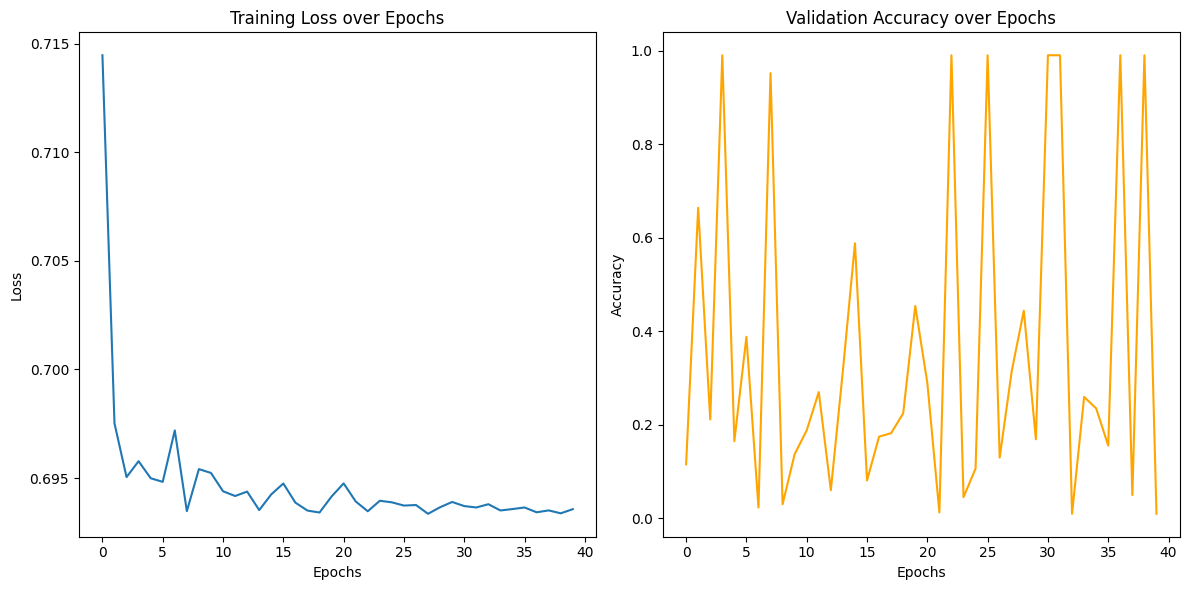

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import torch.nn.functional as F
import time
from tensorflow.keras.layers import Dense, Dropout
from sklearn.utils import class_weight
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestClassifier

# Convert back to PyTorch tensors
X_train = torch.tensor(XT, dtype=torch.float32)
X_val = torch.tensor(XV, dtype=torch.float32)
y_train = torch.tensor(YT, dtype=torch.float32)
y_val = torch.tensor(YV, dtype=torch.float32)
# If y_train is a PyTorch tensor, convert it to a NumPy array first
if torch.is_tensor(y_train):
    y_train = y_train.numpy()  # Convert to numpy array
y_train = y_train.astype(int)

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights))

# Build the model
model = Sequential()
optimizer = Adam(learning_rate=0.0001)
# Input layer (with L2 regularization)
model.add(Dense(32,
                input_dim=X_train.shape[1],
                activation='relu',
                kernel_regularizer=regularizers.l2(0.0001)))  # L2 regularization with lambda = 0.01
model.add(Dropout(0.5))  # Dropout layer with a dropout rate of 50%

# Hidden layer with L2 regularization
model.add(Dense(16,
                activation='relu',
                kernel_regularizer=regularizers.l2(0.0001)))  # L2 regularization
model.add(Dropout(0.5))  # Dropout layer with a dropout rate of 50%

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and measure time
start_time = time.time()
history = model.fit(X_train, y_train, epochs=40, batch_size=30,
                    validation_data=(X_val, y_val), class_weight=class_weights)
end_time = time.time()

# Report the results
training_time = end_time - start_time
training_loss = history.history['loss']
validation_accuracy = history.history['val_accuracy']

# Final evaluation on the validation set
final_loss, final_accuracy = model.evaluate(X_val, y_val)

# Display results
print(f"Training Time: {training_time:.2f} seconds")
print(f"Final Validation Accuracy: {final_accuracy:.4f}")
print(f"Final Validation Loss: {final_loss:.4f}")

# Plot training loss and validation accuracy over epochs (optional)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


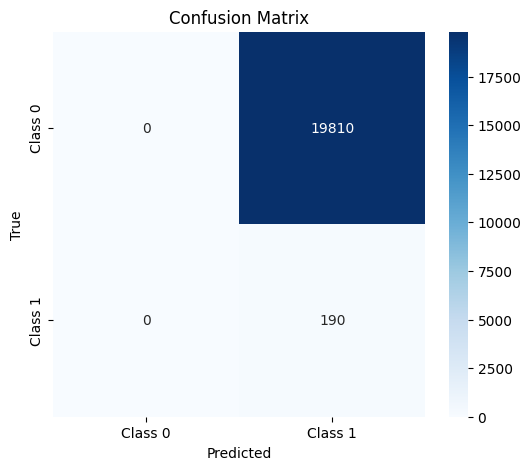

In [ ]:
# Get predictions from the validation set
y_pred_prob = model.predict(X_val)  # Probability values (sigmoid output)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert to binary (0 or 1)

# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()